### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [6]:
# Calculamos los ingresos totales
ingresos = {
    'Tienda1': tienda['Precio'].sum(),
    'Tienda2': tienda2['Precio'].sum(),
    'Tienda3': tienda3['Precio'].sum(),
    'Tienda4': tienda4['Precio'].sum()
}



In [7]:
# Mostramos los resultados ordenados
ingresos_df = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total (USD)'])
ingresos_df = ingresos_df.sort_values(by='Ingreso Total (USD)', ascending=False)

ingresos_df

,Tienda,Ingreso Total (USD)
0,Tienda1,1.150880e+09
1,Tienda2,1.116344e+09
2,Tienda3,1.098020e+09
3,Tienda4,1.038376e+09


# 2. Ventas por categoría

In [10]:
# Añadir la columna "tienda" para identificar cada tienda
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

In [16]:
# Función para cargar y corregir columnas
def cargar_tienda(url, nombre):
    df = pd.read_csv(url, encoding='latin1')
    df.columns = [
        "producto", "categoria", "precio", "envio", "fecha_compra",
        "vendedor", "lugar_compra", "calificacion", "metodo_pago",
        "cuotas", "lat", "lon"
    ]
    df["tienda"] = nombre
    return df


In [17]:
# Cargar las tiendas
tienda1 = cargar_tienda(url, "Tienda 1")
tienda2 = cargar_tienda(url2, "Tienda 2")
tienda3 = cargar_tienda(url3, "Tienda 3")
tienda4 = cargar_tienda(url4, "Tienda 4")

In [18]:
# Unir los datos
datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría, y contar las ventas (filas)
ventas_categoria = datos.groupby(['tienda', 'categoria']).size().reset_index(name='cantidad_vendida')

# Ordenar por tienda y ventas
ventas_categoria = ventas_categoria.sort_values(by=['tienda', 'cantidad_vendida'], ascending=[True, False])

# Mostrar
ventas_categoria

,tienda,categoria,cantidad_vendida
7,Tienda 1,Muebles,465
3,Tienda 1,ElectrÃ³nicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,ElectrodomÃ©sticos,312
1,Tienda 1,Deportes y diversiÃ³n,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,ArtÃ­culos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,ElectrÃ³nicos,422


# 3. Calificación promedio de la tienda


In [19]:
# Asegurarnos de que la columna 'calificacion' sea numérica
datos["calificacion"] = pd.to_numeric(datos["calificacion"], errors='coerce')

# Calcular el promedio de calificaciones por tienda
promedio_calificaciones = datos.groupby("tienda")["calificacion"].mean().reset_index()

# Redondear a 2 decimales para mejor presentación
promedio_calificaciones["calificacion"] = promedio_calificaciones["calificacion"].round(2)

# Mostrar resultados
promedio_calificaciones

,tienda,calificacion
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [21]:
# Contar cuántas veces se vendió cada producto en cada tienda
ventas_productos = datos.groupby(['tienda', 'producto']).size().reset_index(name='cantidad_vendida')
# Agrupar para obtener el más vendido y el menos vendido por tienda
mas_vendidos = ventas_productos.loc[ventas_productos.groupby('tienda')['cantidad_vendida'].idxmax()]
menos_vendidos = ventas_productos.loc[ventas_productos.groupby('tienda')['cantidad_vendida'].idxmin()]



In [22]:
print("📈 Productos más vendidos por tienda:")
display(mas_vendidos)

print("📉 Productos menos vendidos por tienda:")
display(menos_vendidos)


📈 Productos más vendidos por tienda:


,tienda,producto,cantidad_vendida
1,Tienda 1,Armario,60
75,Tienda 2,Iniciando en programaciÃ³n,65
129,Tienda 3,Kit de bancas,57
163,Tienda 4,Cama box,62


📉 Productos menos vendidos por tienda:


,tienda,producto,cantidad_vendida
4,Tienda 1,Auriculares con micrÃ³fono,33
77,Tienda 2,Juego de mesa,32
111,Tienda 3,Bloques de construcciÃ³n,35
175,Tienda 4,Guitarra elÃ©ctrica,33


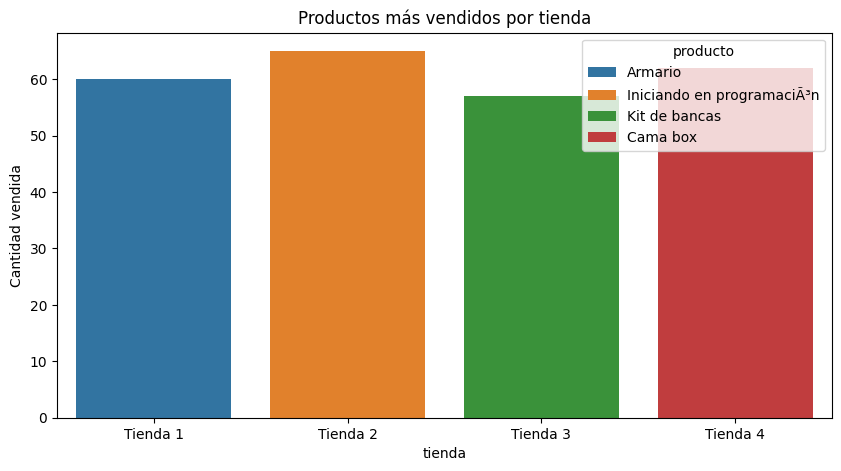

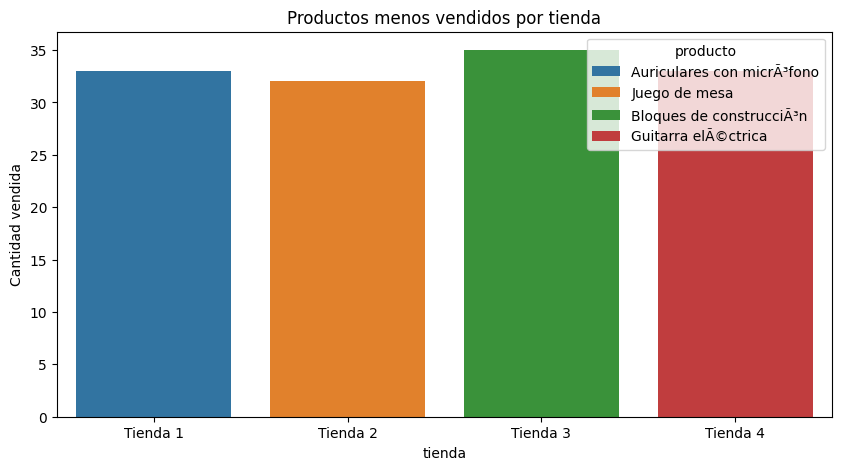

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de los más vendidos
plt.figure(figsize=(10, 5))
sns.barplot(data=mas_vendidos, x='tienda', y='cantidad_vendida', hue='producto')
plt.title('Productos más vendidos por tienda')
plt.ylabel('Cantidad vendida')
plt.show()

# Gráfico de los menos vendidos
plt.figure(figsize=(10, 5))
sns.barplot(data=menos_vendidos, x='tienda', y='cantidad_vendida', hue='producto')
plt.title('Productos menos vendidos por tienda')
plt.ylabel('Cantidad vendida')
plt.show()


# 5. Envío promedio por tienda

In [25]:
# Convertimos la columna "envio" a tipo numérico (por si hay errores o strings)
datos["envio"] = pd.to_numeric(datos["envio"], errors='coerce')

# Agrupar por tienda y calcular el promedio de envío
promedio_envio = datos.groupby("tienda")["envio"].mean().reset_index()

# Redondear para mostrar bonito
promedio_envio["envio"] = promedio_envio["envio"].round(2)

# Mostrar
promedio_envio


,tienda,envio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


<ipython-input-26-20d4f10d087c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_envio, x='tienda', y='envio', palette='Blues_d')


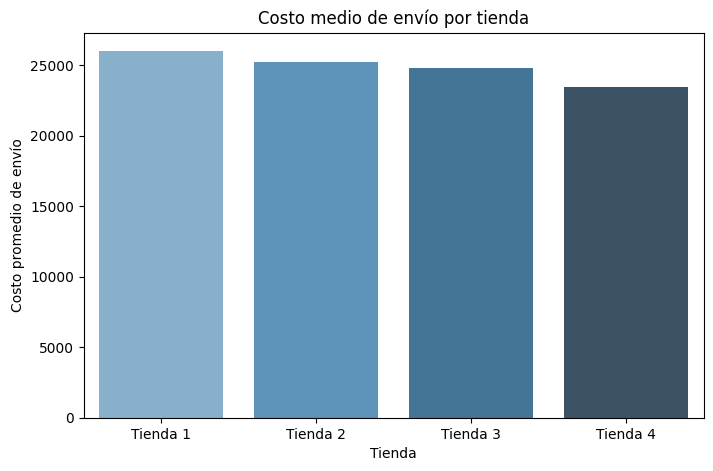

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=promedio_envio, x='tienda', y='envio', palette='Blues_d')
plt.title('Costo medio de envío por tienda')
plt.ylabel('Costo promedio de envío')
plt.xlabel('Tienda')
plt.show()
